Phân tích đại học bách khoa hà nội 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
raw_df =  pd.read_csv('/workspaces/22022546_T--Nguy-n-D-ng/Data/ktqdNEU.csv')
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        114 non-null    int64  
 1   text                           113 non-null    object 
 2   post_text                      96 non-null     object 
 3   shared_text                    18 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           114 non-null    object 
 6   timestamp                      114 non-null    int64  
 7   image                          77 non-null     object 
 8   image_lowquality               114 non-null    object 
 9   images                         114 non-null    object 
 10  images_description             114 non-null    object 
 11  images_lowquality              114 non-null    object 
 12  images_lowquality_description  114 non-null    obj

CLEANING DATA

In [76]:
used_data = raw_df[['post_id','post_text','text','time','images_description','comments','shares','comments_full','reactors','reactions','reaction_count']]
used_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542
1,323743073790793,NaN,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,[],628,0,[],NaN,NaN,1300
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,[],55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,[],"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314
...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,[],220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,[],111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320
111,1237176660290613,NaN,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",2023-08-26 05:36:06,[],5,0,[],NaN,NaN,218
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,[],988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105


In [77]:
clean_data = used_data.fillna({"reactions" : "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}",
                                "post_text" : "No post text",
                                "text" : "No text"})
def replace_empty_string(value):
    return value if ((isinstance(value, str)) and (value != '[]')) else 'No photo description available'
def replace_empty_comment(cm):
    return cm if ((isinstance(cm, str)) and (cm != '[]')) else 'No comment available'
def replace_empty_reactors(r):
    return r if ((isinstance(r, str)) and (r != '[]' or  r != 'NaN')) else 'No reators available'
def reset_reaction_count(rc):
    for i in range(len(rc)):
        if clean_data['reactions'][i] == "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}":
             clean_data.loc[i, 'reaction_count'] = 0
clean_data["images_description"] = clean_data["images_description"].apply(replace_empty_string)
clean_data["comments_full"] = clean_data["comments_full"].apply(replace_empty_comment)
clean_data["reactors"] = clean_data["reactors"].apply(replace_empty_comment)
reset_reaction_count(clean_data)
clean_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",No comment available,"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542
1,323743073790793,No post text,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,No photo description available,628,0,No comment available,No comment available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,No comment available,"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,No photo description available,55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,No comment available,"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314
...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,No photo description available,220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,No photo description available,111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320
111,1237176660290613,No post text,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",2023-08-26 05:36:06,No photo description available,5,0,No comment available,No comment available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105


Bài viết có lượt tương tác cao nhất 

In [78]:
sorted_data = clean_data.sort_values(by = 'reaction_count', ascending=False)
sorted_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
95,685739823584420,No post text,No text,2023-09-06 03:24:12,['May be an image of text'],114,18,"[{'comment_id': '6464439700339100', 'comment_u...","[{'name': 'Dương Ngọc Lan', 'link': 'https://f...","{'like': 4753, 'love': 1771, 'haha': 26, 'wow'...",6617
44,712447980913604,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,2023-10-20 01:00:09,"[""May be an image of text that says 'NH CONICN...",361,132,"[{'comment_id': '822701516273487', 'comment_ur...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'like': 3136, 'love': 2334, 'haha': 34, 'wow'...",5606
107,680243077467428,"Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...","Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...",2023-08-27 14:31:57,"['No photo description available.', 'No photo ...",164,45,"[{'comment_id': '1434628217117936', 'comment_u...","[{'name': 'Chu Mạnh', 'link': 'https://faceboo...","{'like': 4056, 'love': 1328, 'haha': 9, 'wow':...",5420
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105
77,696552629169806,LỘ DIỆN NHỮNG TÂN SINH VIÊN ĐẠT THÀNH TÍCH CAO...,LỘ DIỆN NHỮNG TÂN SINH VIÊN ĐẠT THÀNH TÍCH CAO...,2023-09-24 04:57:42,"[""May be an image of 8 people, dais and text t...",133,53,"[{'comment_id': '1448886172557142', 'comment_u...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'like': 2472, 'love': 774, 'haha': 2, 'wow': ...",3278
...,...,...,...,...,...,...,...,...,...,...,...
53,857064789031139,No post text,"WED, OCT 11\nĐại hội lần thứ XVI Công đoàn Giá...",2023-10-11 03:40:24,No photo description available,0,0,No comment available,No comment available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
1,323743073790793,No post text,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,No photo description available,628,0,No comment available,No comment available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
59,709385851034617,No post text,"SAT, OCT 7\nLỄ KHAI GIẢNG HỆ VỪA HỌC VỪA LÀM",2023-10-06 05:51:24,No photo description available,1,0,No comment available,No comment available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
60,301086612656028,No post text,"SAT, OCT 7\nLỄ KHAI GIẢNG VÀ TRAO BẰNG TIẾN SĨ",2023-10-06 03:16:26,No photo description available,0,0,No comment available,No comment available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0


ANALYSE DATA

Bài đăng có nhiều lượt tương tác nhất 

In [79]:
highest_reaction_post = sorted_data.iloc[0]
highest_reaction_post

post_id                                                 685739823584420
post_text                                                  No post text
text                                                            No text
time                                                2023-09-06 03:24:12
images_description                          ['May be an image of text']
comments                                                            114
shares                                                               18
comments_full         [{'comment_id': '6464439700339100', 'comment_u...
reactors              [{'name': 'Dương Ngọc Lan', 'link': 'https://f...
reactions             {'like': 4753, 'love': 1771, 'haha': 26, 'wow'...
reaction_count                                                     6617
Name: 95, dtype: object

Nội dung bài viết

In [80]:
highest_reaction_post['post_text']

'No post text'

Số lượt tương tác 

In [81]:
highest_reaction_post['reaction_count']

6617

In [82]:
highest_reaction_post['reactions']

"{'like': 4753, 'love': 1771, 'haha': 26, 'wow': 7, 'care': 44, 'sad': 15, 'angry': 1}"

In [83]:
first_row = highest_reaction_post
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


{'like': 4753,
 'love': 1771,
 'haha': 26,
 'wow': 7,
 'care': 44,
 'sad': 15,
 'angry': 1,
 'shares': 18,
 'comments': 114}

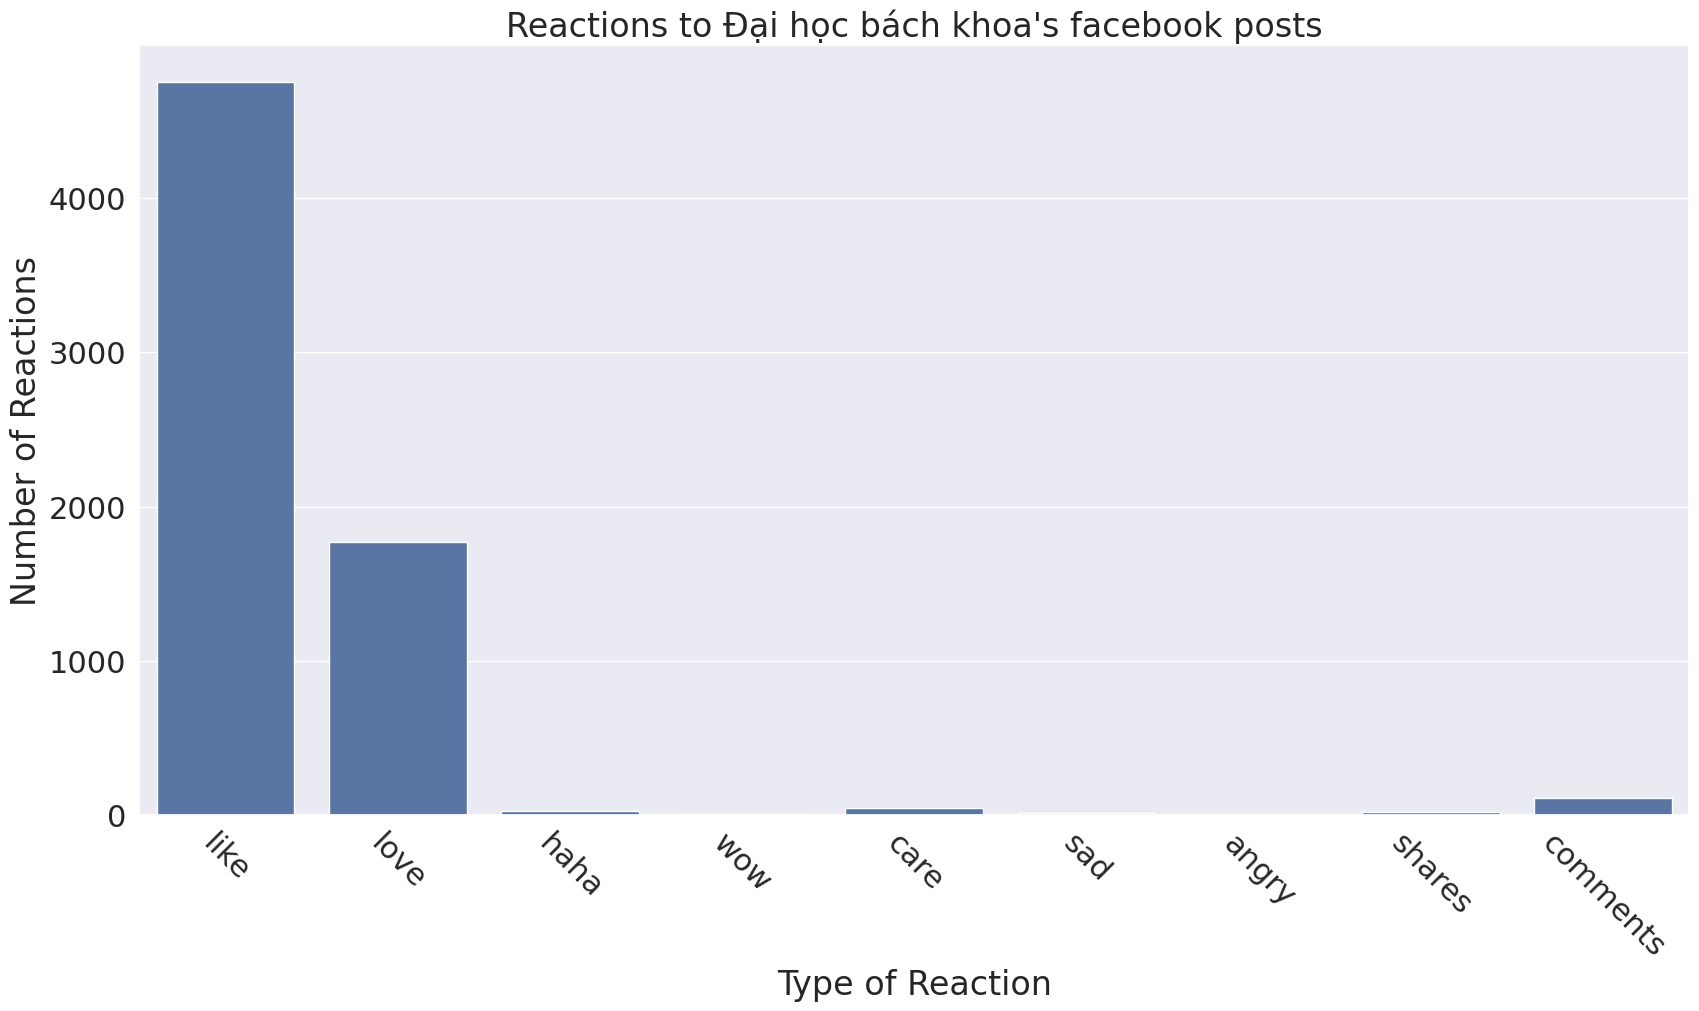

In [84]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)
# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Đại học bách khoa's facebook posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

Trung bình các bài viết 

In [85]:
clean_data['reaction_count'].mean()

781.5263157894736

In [86]:
clean_data['comments'].mean()

81.39473684210526

In [87]:
clean_data['shares'].mean()

21.56140350877193

In [88]:
month = []
hour = []
days = []
for i in range(len(clean_data)):
    time = clean_data['time'][i].split(" ")[1].split(":")
    date = clean_data['time'][i].split(" ")[0].split("-")
    month.append(int(date[1]))
    hour.append(int(time[0]))
    days.append(date[2])

Số lượng bài viết trong 3 tháng gần nhất

Text(0, 0.5, 'Số lượng bài viết')

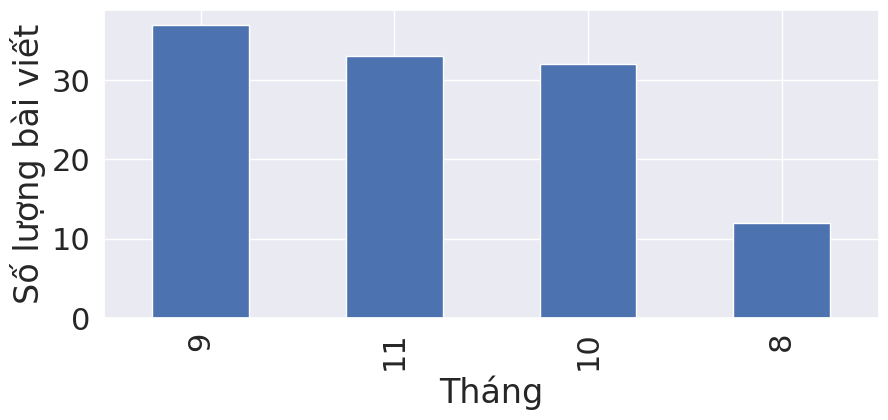

In [89]:
clean_data['day'] = days
clean_data['month'] = month
m = clean_data['month'].value_counts()
bp = m.plot(kind='bar', figsize=(10,4))
bp.set_xlabel("Tháng")
bp.set_ylabel("Số lượng bài viết")

Thời điểm đăng bài 

Text(0, 0.5, 'Số bài đăng')

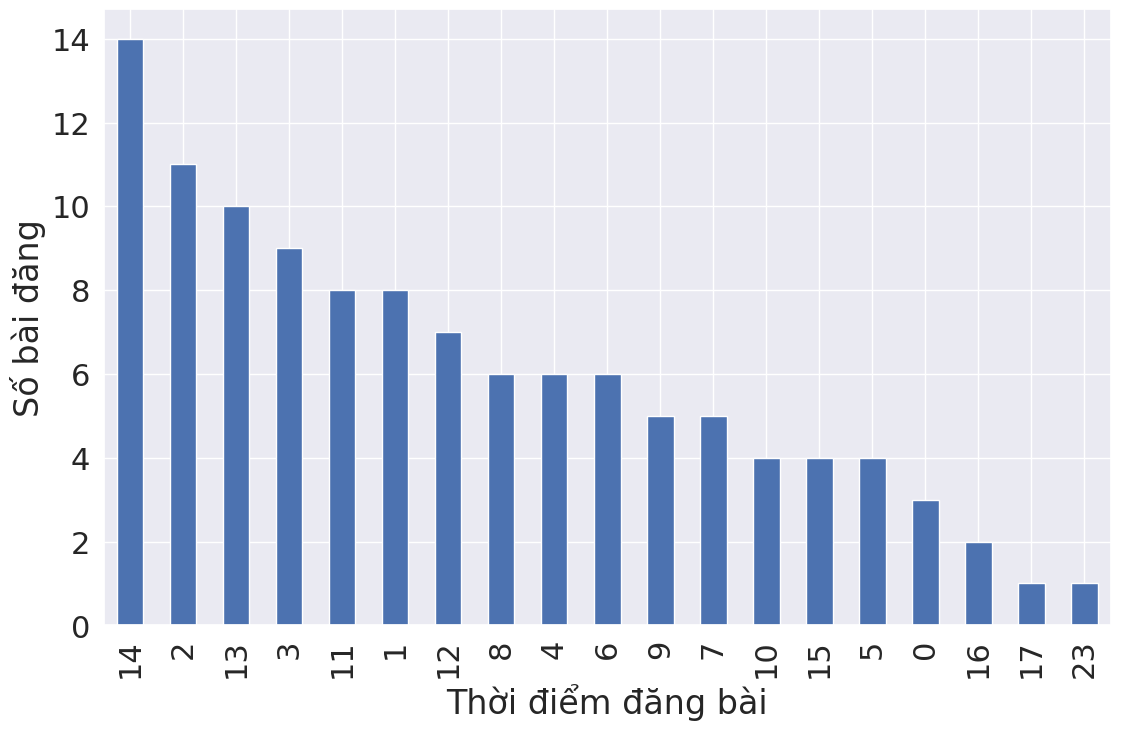

In [90]:
clean_data['hour'] = hour
h = clean_data['hour'].value_counts()
t = h.plot(kind = 'bar', figsize=(13,8))
t.set_xlabel('Thời điểm đăng bài')
t.set_ylabel('Số bài đăng')

Nhận xét: số bài đăng chủ yếu vào lúc 19h tối và khoảng 9h sáng

In [91]:
import ast
thich = []
yeu_thich = []
haha = []
wow = []
thuong_thuong = []
buon = []
phan_no = []
for i in range(len(clean_data)):
     if ((clean_data['reaction_count'][i] != 0)):
            dictionary_result = ast.literal_eval(clean_data['reactions'][i])
            so_luot_thich = dictionary_result.get('thích', 0) + dictionary_result.get('like',0)
            so_yeu_thich = dictionary_result.get('yêu thích', 0) + dictionary_result.get('love', 0)
            so_haha = dictionary_result.get('haha', 0)
            so_wow = dictionary_result.get('wow',0)
            so_thuong_thuong = dictionary_result.get('thương thương',0) +dictionary_result.get('care', 0)
            so_buon = dictionary_result.get('buồn', 0) + dictionary_result.get('sad', 0)
            so_phan_no = dictionary_result.get('phẫn nộ',0) + dictionary_result.get('angry', 0)
            thich.append(so_luot_thich)
            yeu_thich.append(so_yeu_thich)
            haha.append(so_haha)
            wow.append(so_wow)
            thuong_thuong.append(so_thuong_thuong)
            buon.append(so_buon)
            phan_no.append(so_phan_no)
     else:
            thich.append(0)
            yeu_thich.append(0)
            haha.append(0)
            wow.append(0)
            thuong_thuong.append(0)
            buon.append(0)
            phan_no.append(0)


Tổng số lượng và tỷ lệ các reaction trong các bài viết 

In [92]:
s = pd.DataFrame({'Số lượng': [sum(thich),sum(yeu_thich),sum(haha),sum(wow),sum(thuong_thuong),sum(buon),sum(phan_no)],
                  'Phần trăm (%)': [(sum(thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(yeu_thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(haha)/sum(raw_df['reaction_count']))*100,
                                   (sum(wow)/sum(raw_df['reaction_count']))*100,
                                   (sum(thuong_thuong)/sum(raw_df['reaction_count']))*100,
                                   (sum(buon)/sum(raw_df['reaction_count']))*100,
                                   (sum(phan_no)/sum(raw_df['reaction_count']))*100]})
s.index = ['Thích','Yêu thích','Haha','Wow','Thương thương','Buồn','Phẫn nộ']
s

,Số lượng,Phần trăm (%)
Thích,63558,65.930851
Yêu thích,21455,22.255993
Haha,2154,2.234417
Wow,215,0.223027
Thương thương,709,0.735470
Buồn,997,1.034222
Phẫn nộ,6,0.006224


<Axes: >

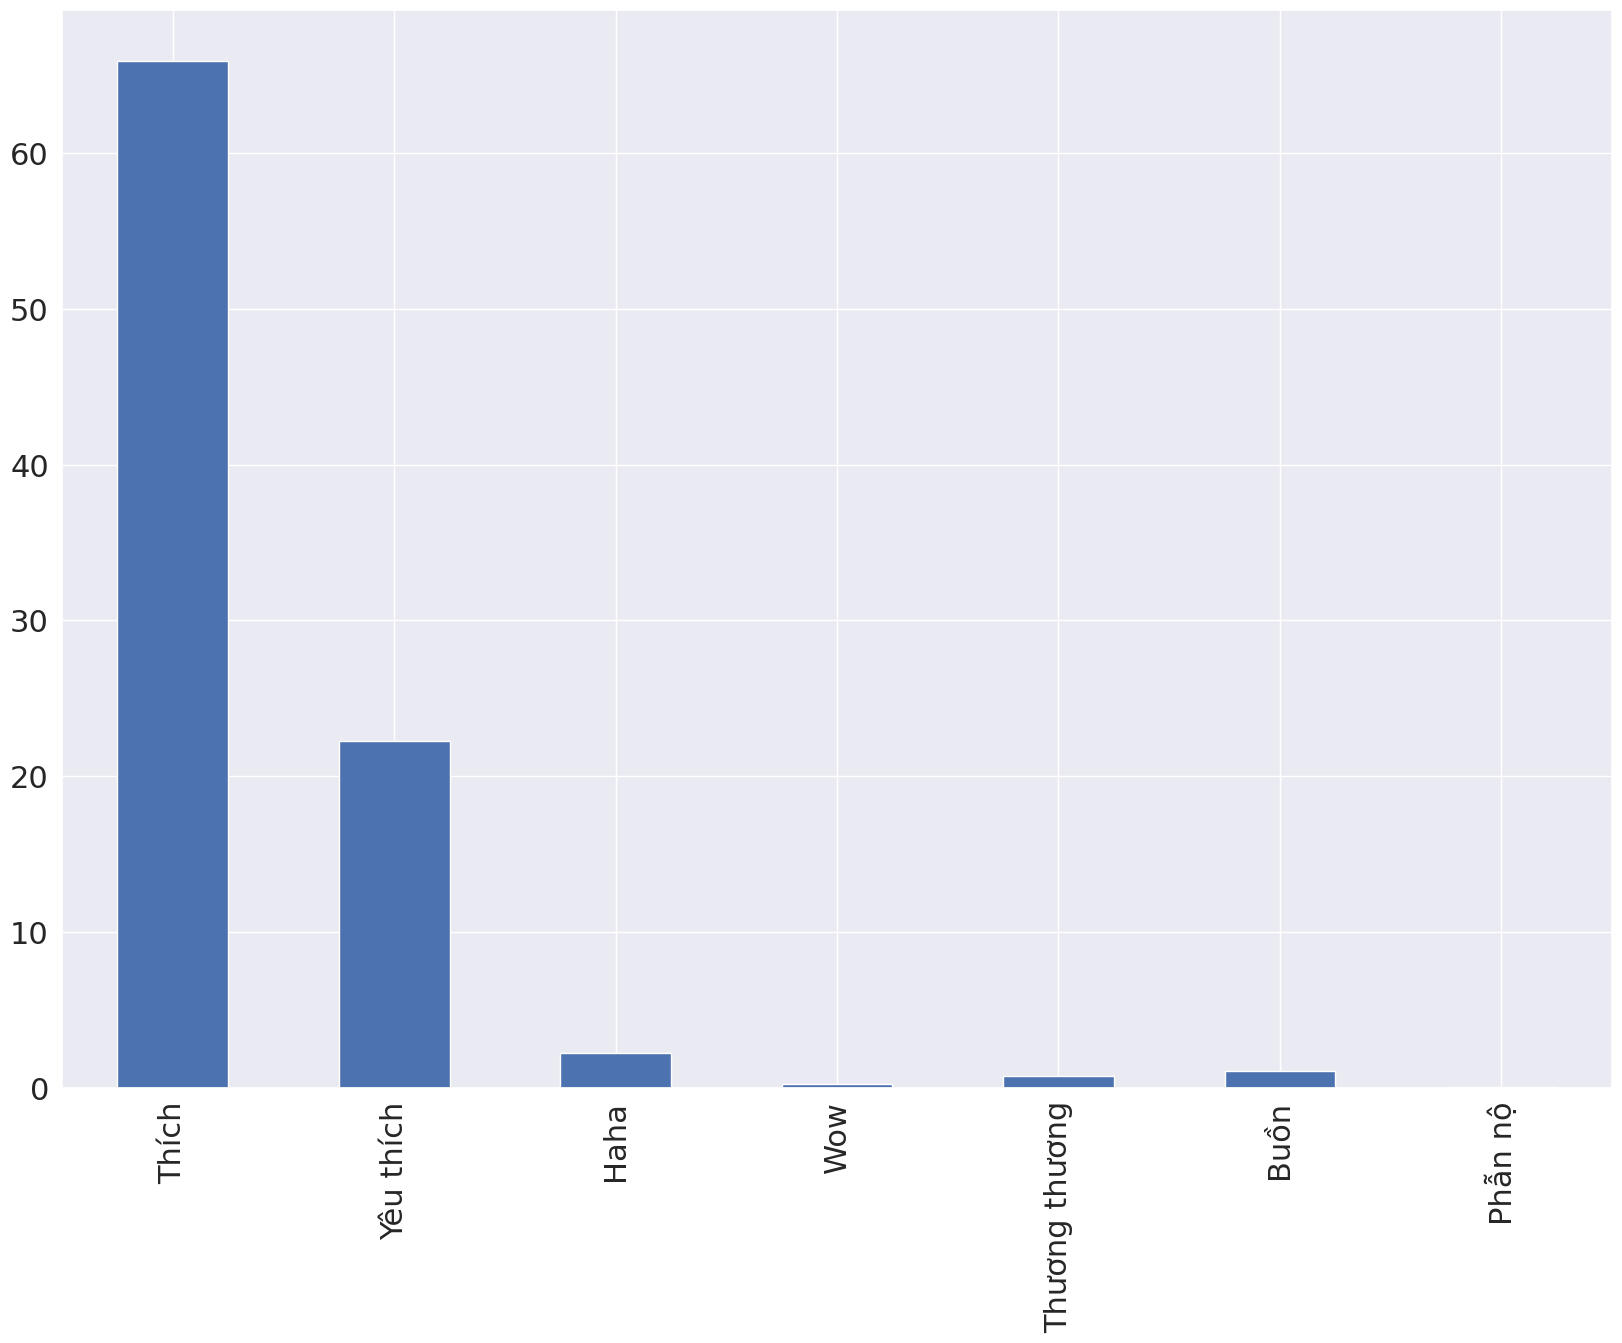

In [93]:
s['Phần trăm (%)'].plot(kind='bar', figsize=(20,14))

In [94]:
clean_data['thích'] = thich
clean_data['yêu_thích'] = yeu_thich
clean_data['haha'] = haha
clean_data['wow'] = wow
clean_data['thương_thương'] = thuong_thuong
clean_data['buồn'] = buon
clean_data['phẫn_nộ'] = phan_no
clean_data['day'] = days

In [95]:
len(clean_data.loc[clean_data['month'] == 9])

37

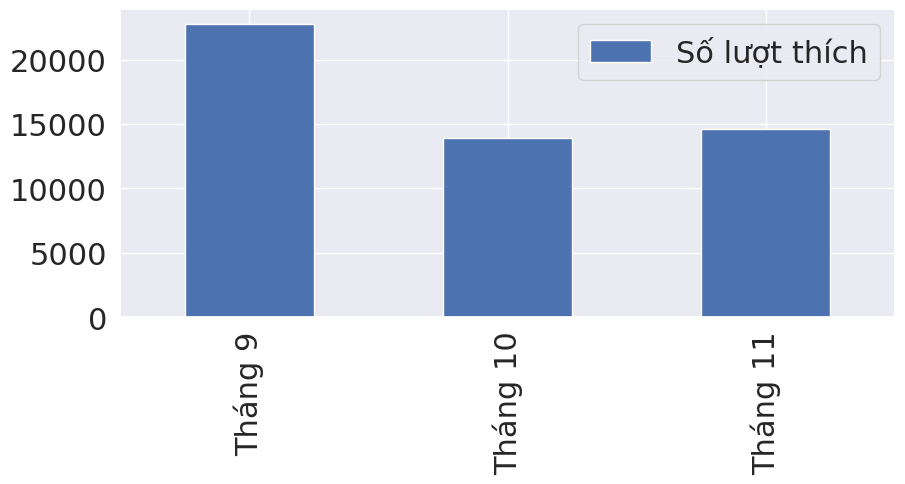

In [96]:
likes_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].thích)
likes_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].thích)
likes_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].thích)
l = pd.DataFrame({'Số lượt thích': [likes_of_month_9,likes_of_month_10,likes_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

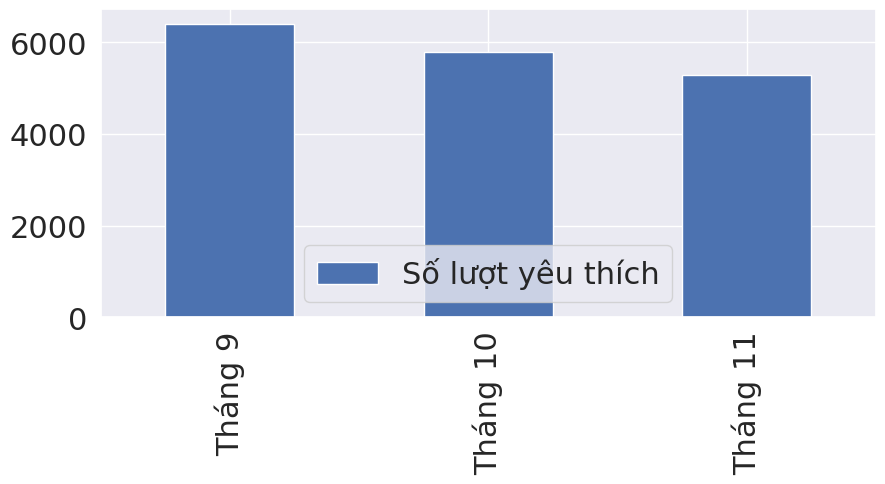

In [97]:
loves_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].yêu_thích)
loves_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].yêu_thích)
loves_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].yêu_thích)
l = pd.DataFrame({'Số lượt yêu thích': [loves_of_month_9,loves_of_month_10,loves_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

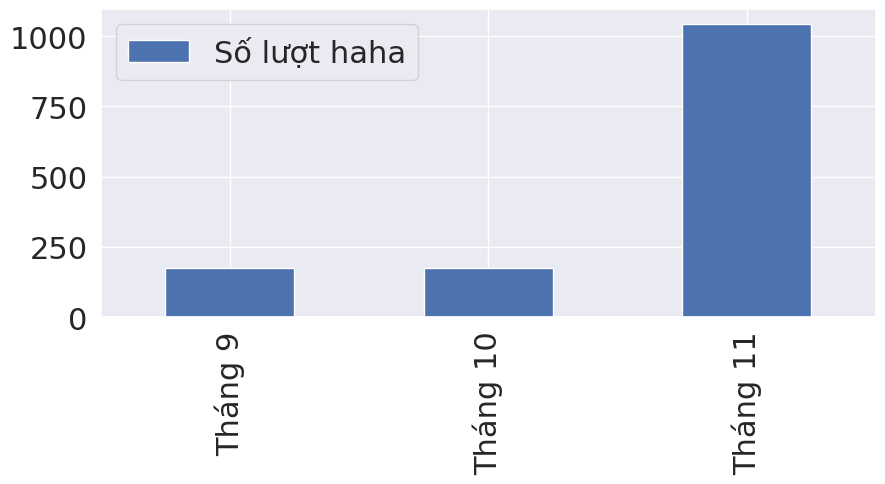

In [98]:
haha_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].haha)
haha_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].haha)
haha_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].haha)
l = pd.DataFrame({'Số lượt haha': [haha_of_month_9,haha_of_month_10,haha_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

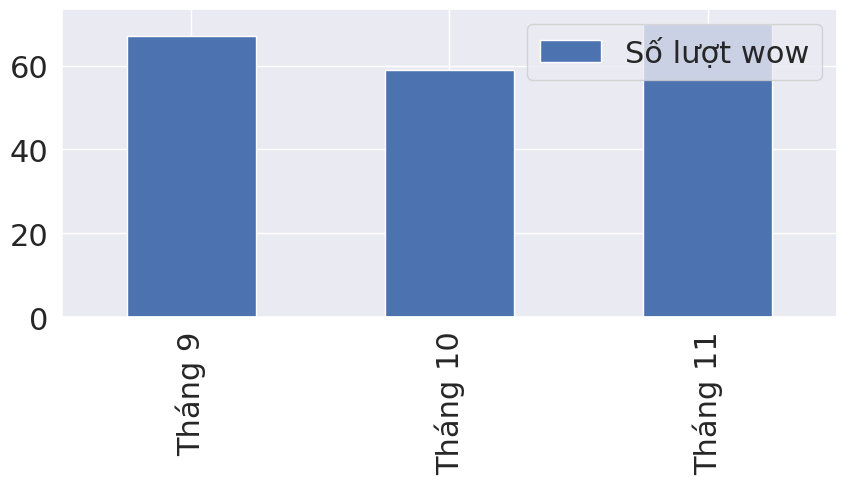

In [99]:
wow_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].wow)
wow_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].wow)
wow_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].wow)
l = pd.DataFrame({'Số lượt wow': [wow_of_month_9,wow_of_month_10,wow_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

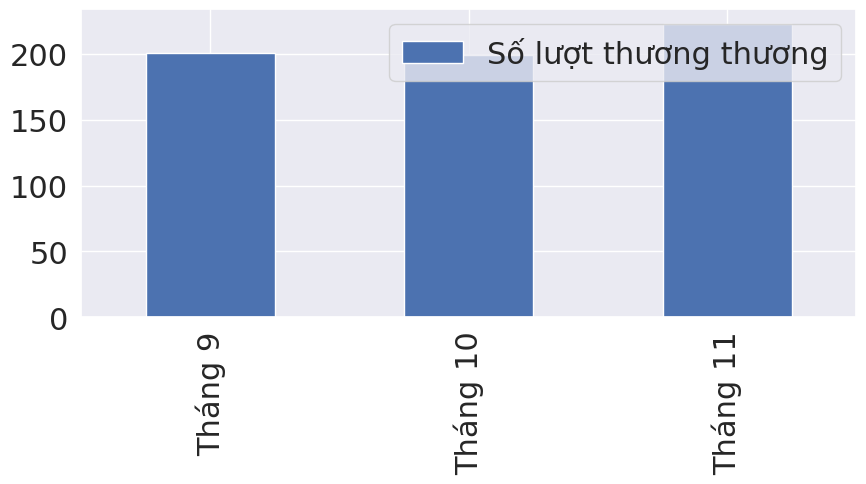

In [100]:
tt_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].thương_thương)
tt_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].thương_thương)
tt_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].thương_thương)
l = pd.DataFrame({'Số lượt thương thương': [tt_of_month_9,tt_of_month_10,tt_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

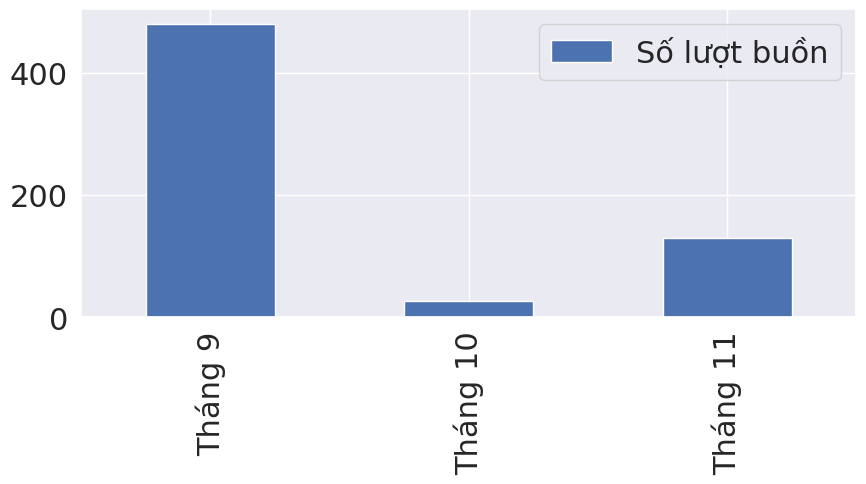

In [101]:
buon_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].buồn)
buon_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].buồn)
buon_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].buồn)
l = pd.DataFrame({'Số lượt buồn': [buon_of_month_9,buon_of_month_10,buon_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

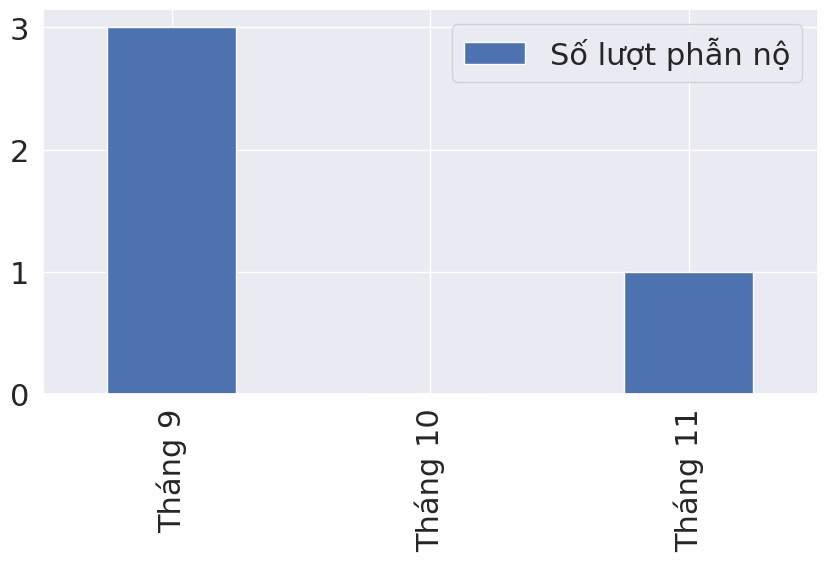

In [102]:
phan_no_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].phẫn_nộ)
phan_no_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].phẫn_nộ)
phan_no_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].phẫn_nộ)
l = pd.DataFrame({'Số lượt phẫn nộ': [phan_no_of_month_9,phan_no_of_month_10,phan_no_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

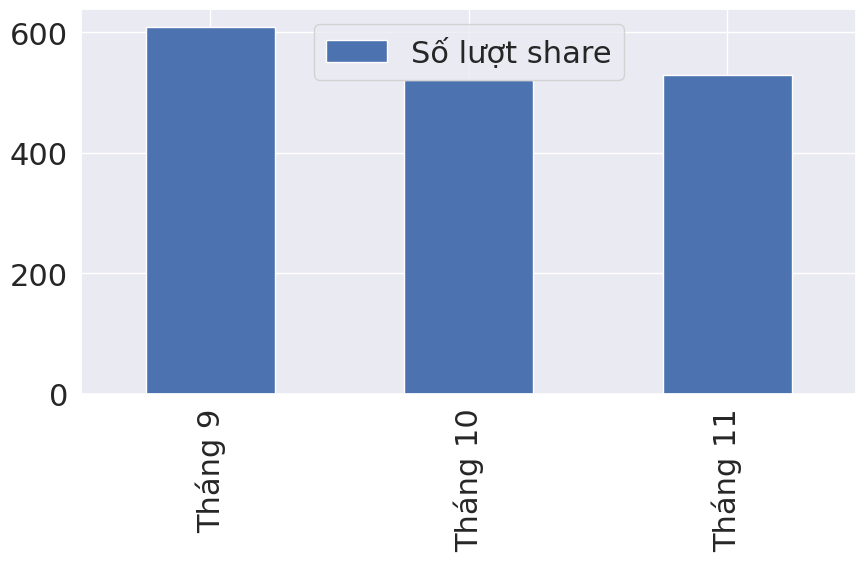

In [103]:
shares_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].shares)
shares_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].shares)
shares_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].shares)
l = pd.DataFrame({'Số lượt share': [shares_of_month_9,shares_of_month_10,shares_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

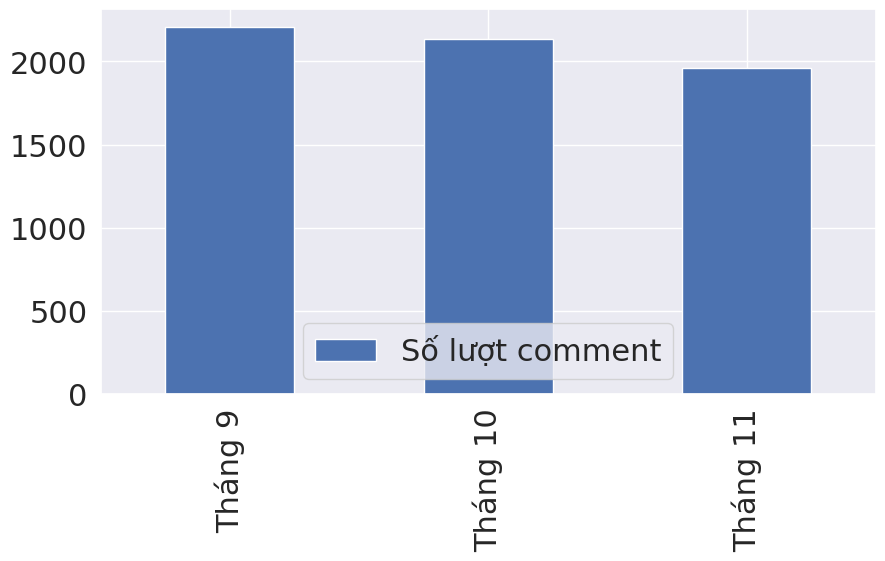

In [104]:
cm_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].comments)
cm_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].comments)
cm_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].comments)
l = pd.DataFrame({'Số lượt comment': [cm_of_month_9,cm_of_month_10,cm_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

Nhận xét: Tháng 10 có số lượt tương tác của các reaction cao nhất. Tháng 10 cũng là tháng có nhiều lượt comment và lượt share nhất trong 3 tháng gần nhất 


Lượng tương tác theo từng tháng 


In [105]:
month_data = pd.DataFrame({"Thích" : [likes_of_month_9, likes_of_month_10, likes_of_month_11],
                           "Yêu_thích" : [loves_of_month_9, loves_of_month_10, loves_of_month_11],
                           "Wow" : [wow_of_month_9, wow_of_month_10, wow_of_month_11],
                           "Haha" : [haha_of_month_9, haha_of_month_10, haha_of_month_11],
                           "Thương_thương" : [tt_of_month_9, tt_of_month_10, tt_of_month_11],
                           "Buồn" : [buon_of_month_9, buon_of_month_10, buon_of_month_11],
                           "Phẫn_nộ" : [phan_no_of_month_9, phan_no_of_month_10, phan_no_of_month_11],
                           "Shares" : [shares_of_month_9, shares_of_month_10, shares_of_month_11],
                           "Comment" : [cm_of_month_9, cm_of_month_10, cm_of_month_11]})
month_data.index = ['Tháng_9', 'Tháng_10', 'Tháng_11']
month_data

,Thích,Yêu_thích,Wow,Haha,Thương_thương,Buồn,Phẫn_nộ,Shares,Comment
Tháng_9,22788,6408,67,175,201,480,3,608,2204
Tháng_10,13942,5788,59,175,199,26,0,520,2136
Tháng_11,14622,5289,70,1044,223,129,1,529,1959


Các từ có tần xuất xuất hiện nhiều trong các bài viết 

Note: you may need to restart the kernel to use updated packages.


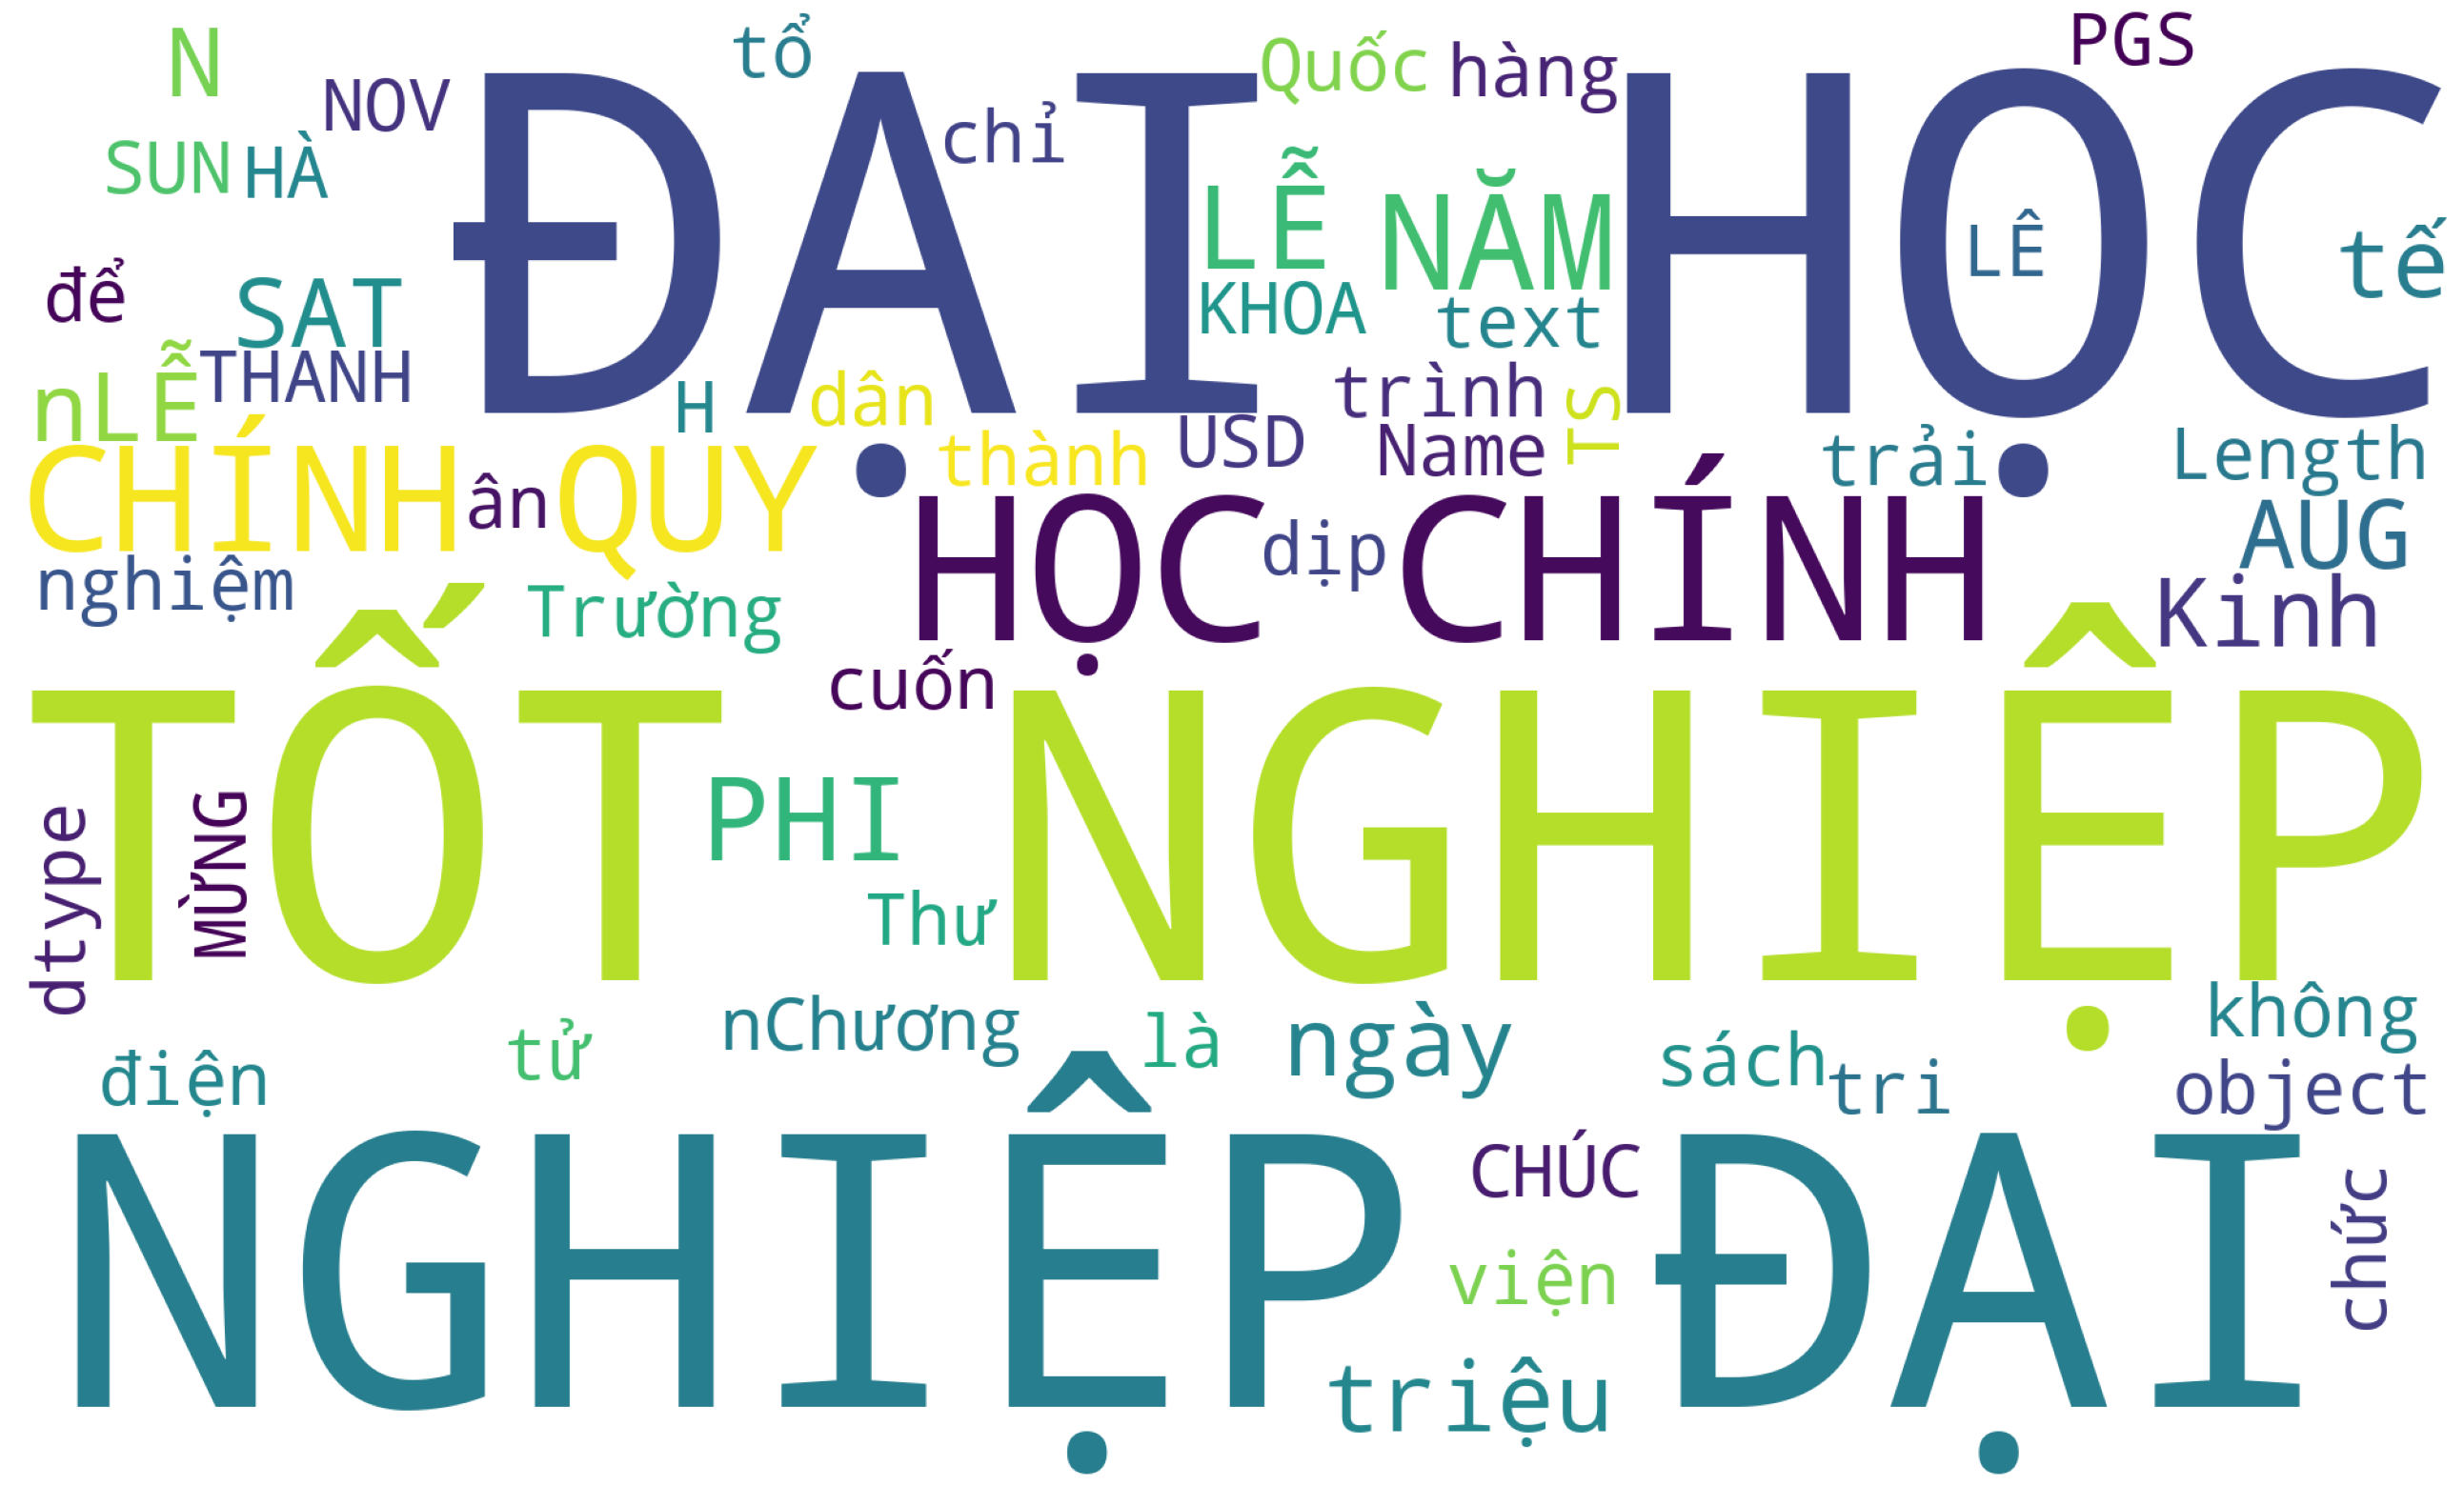

In [106]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

text = str(clean_data['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [107]:
len(clean_data.loc[(clean_data['reaction_count'] > 100) & (clean_data['reaction_count'] < 500)])

38

Thông tin về bài viết gần nhất trên Page đại học bách khoa Hà Nội 

In [108]:
clean_data.iloc[0]

post_id                                                 732948108863591
post_text             Thư viện điện tử 11 triệu USD, triệu cuốn sách...
text                  Thư viện điện tử 11 triệu USD, triệu cuốn sách...
time                                                2023-11-25 11:25:19
images_description    ['May be an image of text', 'May be an image o...
comments                                                            175
shares                                                               77
comments_full         [{'comment_id': '648537020689218', 'comment_ur...
reactors                                           No comment available
reactions             {'like': 1123, 'love': 382, 'haha': 4, 'wow': ...
reaction_count                                                     1542
day                                                                  25
month                                                                11
hour                                                            

In [109]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


{'like': 1123,
 'love': 382,
 'haha': 4,
 'wow': 19,
 'care': 11,
 'sad': 3,
 'shares': 77,
 'comments': 175}

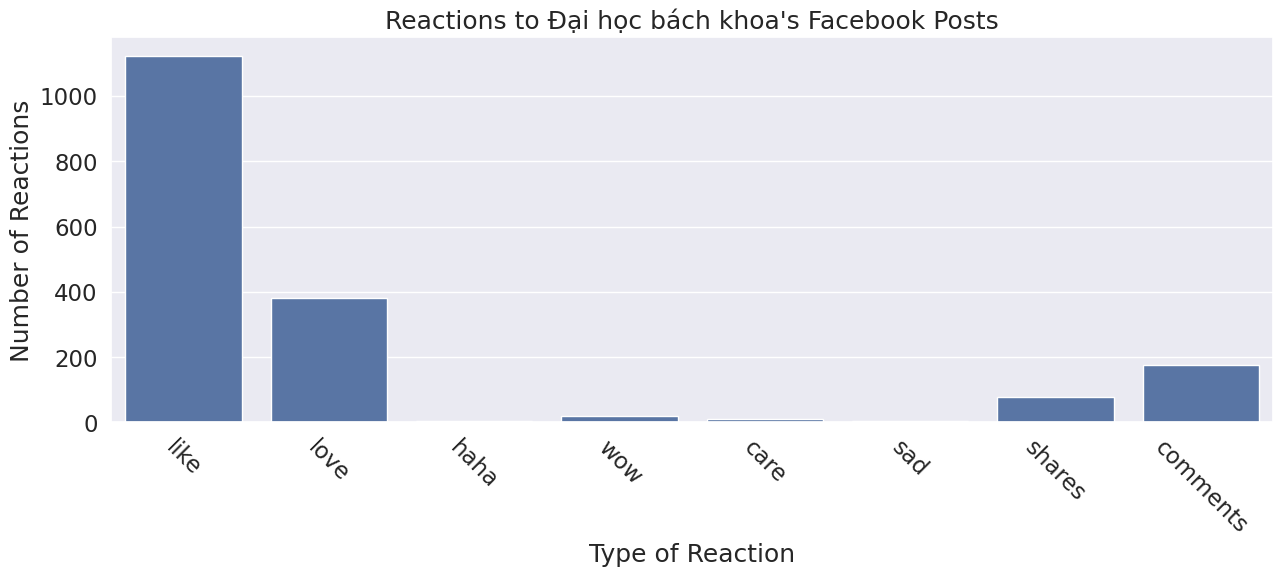

In [110]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Đại học bách khoa's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

Nội dung bài viết gần nhẩt

In [111]:
df_text = raw_df.iloc[0][['post_id','post_text']]
text    = str(df_text['post_text'])
df_text['post_text']

'Thư viện điện tử 11 triệu USD, triệu cuốn sách tại Trường ĐH Kinh tế Quốc dân có gì đặc biệt?\n\n👉 Đây là Thư viện điện tử dùng chung cho 45 trường đại học trong nước, tổng vốn đầu tư trị giá đến 11 triệu USD đặt tại tầng 10 khu giảng đường chính của trường ĐH Kinh tế Quốc dân. Vào lúc cao điểm có tới hàng nghìn sinh viên đến thư viện nghiên cứu và học mỗi ngày.\n\n👉 Dự án "Xây dựng Thư viện điện tử dùng chung cho các cơ sở giáo dục đại học ở Việt Nam” thuộc Dự án Nâng cao chất lượng giáo dục đại học (Dự án SAHEP) được Thủ tướng Chính phủ phê duyệt năm 2017 nhằm nâng cao chất lượng đào tạo và nghiên cứu khoa học; thúc đẩy hợp tác và chia sẻ trong nghiên cứu thông qua cung cấp cơ sở dữ liệu điện tử dùng chung, hướng đến xây dựng thư viện đầu mối cho các cơ sở giáo dục đại học ở Việt Nam.\n\n👉 Trường ĐH Kinh tế Quốc dân (NEU) là trường đại học trọng điểm hàng đầu Việt Nam đào tạo về kinh tế, quản lý và quản trị kinh doanh đã được Chính phủ, Bộ Giáo dục và Đào tạo, World Bank lựa chọn là